# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


##Inspecting the data

any comment about data dimensionality/distribution goes here

### Librerie necessarie


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation


Importo i dataset precedentemente collegati tramite drive



In [3]:
X_train = pd.read_csv('drive/MyDrive/Colab_Notebooks/X_train.csv')
Y_train = pd.read_csv('drive/MyDrive/Colab_Notebooks/y_train.csv')
Test = pd.read_csv('drive/MyDrive/Colab_Notebooks/X_test.csv')

Visualizzo i dati e faccio alcune analisi esplorative sul target

In [4]:
print (X_train.shape, Y_train.shape)
print (Test.shape)

(24000, 24) (24000, 2)
(6000, 24)


In [5]:
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         24000 non-null  int64  
 1   LIMIT_BAL  24000 non-null  float64
 2   SEX        24000 non-null  int64  
 3   EDUCATION  24000 non-null  int64  
 4   MARRIAGE   24000 non-null  int64  
 5   AGE        24000 non-null  int64  
 6   PAY_0      24000 non-null  int64  
 7   PAY_2      24000 non-null  int64  
 8   PAY_3      24000 non-null  int64  
 9   PAY_4      24000 non-null  int64  
 10  PAY_5      24000 non-null  int64  
 11  PAY_6      24000 non-null  int64  
 12  BILL_AMT1  24000 non-null  float64
 13  BILL_AMT2  24000 non-null  float64
 14  BILL_AMT3  24000 non-null  float64
 15  BILL_AMT4  24000 non-null  float64
 16  BILL_AMT5  24000 non-null  float64
 17  BILL_AMT6  24000 non-null  float64
 18  PAY_AMT1   24000 non-null  float64
 19  PAY_AMT2   24000 non-null  float64
 20  PAY_AM

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000
mean,15010.821708,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,-0.288750,50927.468417,48914.770500,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125
std,8680.406114,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,1.152394,73400.840274,70923.493353,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7452.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3537.000000,2989.750000,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000
50%,15061.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22321.500000,21140.500000,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22509.250000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66377.000000,63035.250000,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000


In [6]:
Y_train.info()
Y_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          24000 non-null  int64
 1   default.payment.next.month  24000 non-null  int64
dtypes: int64(2)
memory usage: 375.1 KB


,ID,default.payment.next.month
count,24000.000000,24000.000000
mean,15010.821708,0.221792
std,8680.406114,0.415460
min,1.000000,0.000000
25%,7452.500000,0.000000
50%,15061.500000,0.000000
75%,22509.250000,0.000000
max,29999.000000,1.000000


In [7]:
Test.info()
Test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         6000 non-null   int64  
 1   LIMIT_BAL  6000 non-null   float64
 2   SEX        6000 non-null   int64  
 3   EDUCATION  6000 non-null   int64  
 4   MARRIAGE   6000 non-null   int64  
 5   AGE        6000 non-null   int64  
 6   PAY_0      6000 non-null   int64  
 7   PAY_2      6000 non-null   int64  
 8   PAY_3      6000 non-null   int64  
 9   PAY_4      6000 non-null   int64  
 10  PAY_5      6000 non-null   int64  
 11  PAY_6      6000 non-null   int64  
 12  BILL_AMT1  6000 non-null   float64
 13  BILL_AMT2  6000 non-null   float64
 14  BILL_AMT3  6000 non-null   float64
 15  BILL_AMT4  6000 non-null   float64
 16  BILL_AMT5  6000 non-null   float64
 17  BILL_AMT6  6000 non-null   float64
 18  PAY_AMT1   6000 non-null   float64
 19  PAY_AMT2   6000 non-null   float64
 20  PAY_AMT3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,14959.213167,168515.000000,1.599000,1.849667,1.553667,35.450000,-0.016833,-0.143333,-0.158333,-0.221667,-0.270333,-0.300500,52406.780833,50236.293833,48037.445500,44260.616167,40955.672833,39304.640167,5634.596333,5761.414167,5095.421500,4606.995833,4721.541167,5439.664333
std,8580.495129,129804.158748,0.490142,0.783051,0.518811,9.149232,1.113144,1.195280,1.217447,1.173354,1.134226,1.140358,74562.970408,72162.483421,69682.063894,65371.581858,61438.887878,60633.455058,14291.261596,17191.910749,14794.321136,12796.017970,13830.882694,18999.354760
min,7.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-13543.000000,-11925.000000,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7643.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3713.500000,2932.750000,2598.750000,2314.250000,1764.250000,1159.750000,1000.000000,750.000000,399.250000,316.000000,279.000000,132.750000
50%,14786.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22719.500000,21352.000000,20293.500000,19185.000000,18163.500000,16823.000000,2200.000000,2021.500000,1893.500000,1567.000000,1504.000000,1502.000000
75%,22437.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69965.250000,67077.750000,63667.500000,56358.250000,50754.000000,49584.750000,5017.250000,5000.000000,4575.750000,4200.000000,4100.000000,4200.000000
max,30000.000000,800000.000000,2.000000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,653062.000000,671563.000000,693131.000000,706864.000000,489200.000000,527566.000000,302000.000000,384986.000000,344261.000000,330982.000000,303512.000000,528666.000000


Noto che i valori non sono tutti dello stesso tipo, sarà quindi necessario portarli tutti in float64 per utilizzarli al meglio. 

Inoltre, in accordo con il Data Dictionary fornito si può notare che nelle colonne **EDUCATION** e **MARRIAGE** il valore minimo presente è zero anche se il valore minimo che tale colonna può assumere è uno: per questo motivo, nella fase di preparazione dei dati, porteremo tutti gli 0 per **EDUCATION** a 6 (unknown) e per **MARRIAGE** a 3 (other). 

In [8]:
print(X_train['EDUCATION'].value_counts())


2    11186
1     8481
3     3959
5      224
4       97
6       43
0       10
Name: EDUCATION, dtype: int64


In [9]:
print(X_train['MARRIAGE'].value_counts())

2    12747
1    10942
3      266
0       45
Name: MARRIAGE, dtype: int64


Controllo quindi se il target sia sbilanciato.

In [10]:
Y_train['default.payment.next.month'].value_counts()

0    18677
1     5323
Name: default.payment.next.month, dtype: int64

Noto che il dataset è profondamente sbilanciata, troviamo che la classe di maggioranza è **default.payment.next.month = 0** sarà quindi necessario bilanciarla.

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

Per prepare in modo più efficiente i dati riunisco **X_train** e **Y_train** in 
un unico dataset **df** e su esso eseguo il bilanciamento del target.

In [11]:
df = pd.merge(X_train, Y_train, on='ID')

In [12]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,15010.821708,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,-0.288750,50927.468417,48914.770500,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125,0.221792
std,8680.406114,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,1.152394,73400.840274,70923.493353,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219,0.415460
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7452.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3537.000000,2989.750000,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000,0.000000
50%,15061.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22321.500000,21140.500000,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22509.250000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66377.000000,63035.250000,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000,0.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


Come precedentemente citato correggo i valori di **EDUCATION** e **MARRIAGE**

In [13]:
fil = (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 6
df.EDUCATION.value_counts()

2    11186
1     8481
3     3959
5      224
4       97
6       53
Name: EDUCATION, dtype: int64

In [14]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    12747
1    10942
3      311
Name: MARRIAGE, dtype: int64

Correggo quindi il bilanciamento del target effettuando un downsampling della classe maggioritaria 

In [15]:
df = df.sort_values(by=['default.payment.next.month'])

In [16]:
df = df.iloc[10000:]

In [17]:
#Downsampling
df = df.sample(frac=1)

In [18]:
df['default.payment.next.month'].value_counts()

0    8677
1    5323
Name: default.payment.next.month, dtype: int64

Ricostruisco quindi la divisione tra il target e le altre variabili. 

In [19]:
X_train_temp = df
Y_train_temp = df[['ID','default.payment.next.month']]
Y_train_temp['default.payment.next.month'].value_counts()
Y_train_temp

,ID,default.payment.next.month
1795,9323,0
636,13264,0
695,29915,0
7121,21290,0
11844,19252,1
...,...,...
2401,11306,1
225,23993,0
13354,4839,1
22988,10358,0


In [20]:
X_train_temp.drop(['ID','SEX','default.payment.next.month'],axis=1,inplace=True)
Y_train_temp.drop(['ID'],axis=1,inplace=True)
Y_train_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,default.payment.next.month
1795,0
636,0
695,0
7121,0
11844,1
...,...
2401,1
225,0
13354,1
22988,0


Divido i dati per l'addestramento e la validazione.

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=0.2, random_state=1)

In [22]:
print(X_train.shape, Y_train.shape, X_val.shape,Y_val.shape, X_train_temp.shape)

(11200, 22) (11200, 1) (2800, 22) (2800, 1) (14000, 22)


Per completare la preparazione dei dati li converto interamente in **float32** ed effettuo la normalizzazione. 

In [23]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

In [24]:
scaler = preprocessing.MinMaxScaler((0,1))
scaler.fit(X_train_temp)

XX_train = scaler.transform(X_train.values)
XX_val  = scaler.transform(X_val.values) 

YY_train = Y_train.values 
YY_val  = Y_val.values 

In [25]:
print (XX_train.shape, YY_train.shape, XX_val.shape, YY_val.shape)


(11200, 22) (11200, 1) (2800, 22) (2800, 1)


## Building the network

Definisco le metriche che mi serviranno per valutare il modello.

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


Per la costruzione del modello ho deciso di creare la mia rete neurale con tre Layer nascosti rispettivamente da 256, 128, 64 che dopo numerose prove è risulato essere il miglior numero di nodi e layer da impiegare.

L'ottimizzatore scelto è SGD con un learning rate di *0.005*.

La funzione di attivazione scelta è una di quelle standard ovvero **relu** e come funzione di attivazione del layer di output **sigmoid** perchè è più efficente dal punto di vista computazionale rispetto a **softmax**. 

In [27]:
nb_classes = 1 

initializer = keras.initializers.GlorotUniform(seed=1234) 

# Modello
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation = "relu", kernel_initializer=initializer))
model.add(Dense(128, activation = "relu", kernel_initializer=initializer))
model.add(Dense(64, activation = "relu", kernel_initializer=initializer))
model.add(Dense(nb_classes, activation='sigmoid',kernel_initializer=initializer))

from tensorflow.keras.optimizers import SGD 
model.compile(optimizer=SGD(learning_rate=0.005), loss='binary_crossentropy',metrics=['accuracy',f1_m,precision_m, recall_m],)

Dopo una serie di prove ho trovato che la grandezza migliore per il **batch_size** è 128.

In [28]:
n_epochs = 300
batch_size = 128 

history = model.fit(XX_train, YY_train, epochs=n_epochs, batch_size=batch_size, validation_data=(XX_val, YY_val))  

Epoch 1/300
88/88 [==============================] - 2s 9ms/step - loss: 0.6929 - accuracy: 0.5148 - f1_m: 0.5238 - precision_m: 0.4725 - recall_m: 0.7338 - val_loss: 0.6842 - val_accuracy: 0.6721 - val_f1_m: 0.3698 - val_precision_m: 0.6382 - val_recall_m: 0.2627
Epoch 2/300
88/88 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.6342 - f1_m: 0.1197 - precision_m: 0.5428 - recall_m: 0.0732 - val_loss: 0.6736 - val_accuracy: 0.6304 - val_f1_m: 0.0195 - val_precision_m: 0.3636 - val_recall_m: 0.0100
Epoch 3/300
88/88 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.6187 - f1_m: 0.0065 - precision_m: 0.1477 - recall_m: 0.0033 - val_loss: 0.6672 - val_accuracy: 0.6282 - val_f1_m: 0.0042 - val_precision_m: 0.0909 - val_recall_m: 0.0022
Epoch 4/300
88/88 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.6179 - f1_m: 0.0020 - precision_m: 0.0455 - recall_m: 0.0010 - val_loss: 0.6627 - val_accuracy: 0.6275 - val_f1

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

Visualizzo ora il training history e il grafico che riassume la loss e l'accuracy del training e della validazione.

In [29]:
print('history dict:', history.history)

history dict: {'loss': [0.6928974986076355, 0.679283857345581, 0.671806275844574, 0.6669813394546509, 0.6635037064552307, 0.6607262492179871, 0.6584093570709229, 0.6564255356788635, 0.6546501517295837, 0.6529910564422607, 0.651432991027832, 0.6498768925666809, 0.6483328342437744, 0.6467543244361877, 0.6450706124305725, 0.6432973146438599, 0.6415086388587952, 0.6397655010223389, 0.6380029916763306, 0.6362161040306091, 0.6344086527824402, 0.6325723528862, 0.6307286620140076, 0.6288773417472839, 0.6270195841789246, 0.6251474022865295, 0.623275101184845, 0.6213984489440918, 0.6195276379585266, 0.617659330368042, 0.6157807111740112, 0.6139562129974365, 0.612152636051178, 0.6103790998458862, 0.6086375117301941, 0.6069695949554443, 0.6053430438041687, 0.6037756204605103, 0.6022614240646362, 0.6008132696151733, 0.5994254946708679, 0.5980519652366638, 0.5967886447906494, 0.5955371260643005, 0.5943451523780823, 0.5931766033172607, 0.592066764831543, 0.590995192527771, 0.5899688005447388, 0.58898

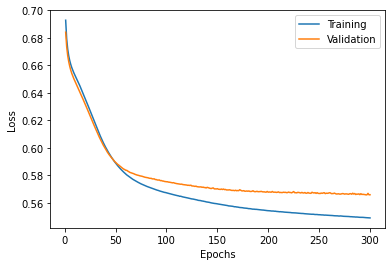

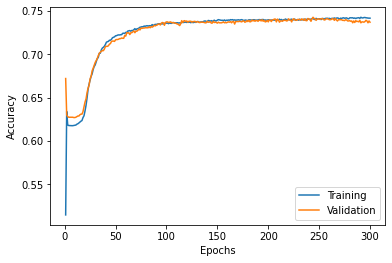

In [30]:
#plot training history

from matplotlib import pyplot as plt
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.ylim(0.6,0.8)#just for better viz
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


plot_history(history)

Dal grafico possiamo vedere come la trainingloss tenda a diminuire e questo è una cosa positiva perchè l'obbiettivo del problema di ottimizzazione è minimizzarla.
La validation loss vediamo che tende a rimanere discostata e iniziare ad alzarsi, segno che con l'aumentare delle epoche avremo un overfitt ovvero che avremmo memorizzato alla perfezione il trainig set e il modello fallirà sul validation data. Questo andamento è segno che non bisogna aumentare le epoche.


Per l'accuracy vediamo che si attesta sul 75% e possiamo osservare come la training e la validation accuracy siano simili che ci da un indicazione sul fatto che non stiamo andando in completo overfitting, ma possiamo già intuire che se proseguiamo con le epoche il training tenderà ad avvicinarsi ad uno e la validation a crollare come già sembra fare intorno alle 260 epoche trovandoci quindi in un caso di overfitting.


## Validate the model and comment the results

La valutazione del modello si basa su loss,accuracy, f1, precision e recall per avere un idea il più completa possibile del modello.

In [34]:
loss, accuracy, f1_score, precision, recall = model.evaluate(XX_val, YY_val, batch_size=batch_size)


22/22 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7371 - f1_m: 0.5700 - precision_m: 0.7255 - recall_m: 0.4739


In [37]:
print("\n%s: %.2f" % ("loss", loss))
print("\n%s: %.2f" % ("accuracy", accuracy))
print("\n%s: %.2f" % ("f1_score", f1_score))
print("\n%s: %.2f" % ("precision", precision))
print("\n%s: %.2f" % ("recall", recall))


loss: 0.57

accuracy: 0.74

f1_score: 0.57

precision: 0.73

recall: 0.47


Il modello in particolare presenta un buon livello di f1_score ma non altissimo da assicurare una buona capacità del modello, si può anche notare come l'accuracy e la precision non siano molto alta se pure buone.

## Make predictions (on the provided test set)

Date le misure di performance precedentemnte illustrate penso che il modello potrebbe non performare al meglio su un dei dai che non sono mai stati visti.

In [38]:
# preprocessing per fare le predizioni
Test.drop(['ID','SEX'], axis=1, inplace=True)
test = Test.astype('float32')
test = scaler.transform(test.values)  


In [39]:
predictions = model.predict(test)
print('predictions shape:', predictions.shape)
predictions[:10]

predictions shape: (6000, 1)


array([[0.2647308 ],
       [0.22536147],
       [0.2619921 ],
       [0.2816325 ],
       [0.31144792],
       [0.22998843],
       [0.44146666],
       [0.52903944],
       [0.20752895],
       [0.33353367]], dtype=float32)

# OPTIONAL -- Export the predictions in the format indicated in the assignment release page.

In [40]:
y_classes = (predictions > 0.5).astype(np.uint8)
unique, counts = np.unique(y_classes, return_counts=True)
dict(zip(unique, counts))

{0: 4919, 1: 1081}

In [44]:
np.savetxt("Artemisia_Sarteschi_829677_score2.txt",y_classes, fmt='%-d')

# OPTIONAL -- Implement some regularization methods of your choice and make a comparison between (training/validation) performances of regularized models (also compare with the case of no regularization)

Attempts in this section will be taken into account, if well-enough done, to (at least partially) compensate for potential incorrectessness in the mandatory sections. 
On the other hand, any incorrectessness in _this_ section won't be taken into account in the final score.